In [18]:
import cv2
import csv
import glob
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.fftpack import fft

In [19]:
#pathの取得
def get_datapath():
    root_path = 'C:/Users/Minoru/Desktop/1209_result/98.8Hz-1204.752' #path を入力
    target_csv_path = osp.join(root_path, '*.csv')
    
    csv_list = []
    
    for path in glob.glob(target_csv_path):
        csv_list.append(path)
    print(csv_list)
    return csv_list

path = get_datapath()

def import_data(name):#nameはデータ番号
    #データセットの読み込み
    dataset=[]
    with open(path[name],'r')as csv_file_1:
        f = csv.reader(csv_file_1)
        for row in f:
            dataset.append([float(r) for r in row])
        dataset=np.array(dataset)
    return dataset



['C:/Users/Minoru/Desktop/1209_result/98.8Hz-1204.752\\2021-12-09-18-41-24-537.csv']


In [20]:
#照度の関数
def illu(data):
    illu = data.T[1]
    return illu

def time(data):
    time = data.T[0]- data.T[0][0]
    return time
    
def interporate(time,illu):
    new_data =[]
    T_s = 1/17.78
    prev_time=None#0.05624296962879
    prev_illu=-1
    threthhold = 1.0*10**8
    for k in range(len(time)):#len(diff)
        if not prev_time or time[k] - prev_time < threthhold:
            new_data.append((time[k], illu[k]))
            prev_time=time[k]
            prev_illu=illu[k]
        else:
            times = (time[k]-prev_time)//(10**9/18)
            for j in range(int(times)-1):
                new_data.append((prev_time+(j+1)*10**9*T_s, prev_illu))
            new_data.append((time[k],illu[k]))
            prev_time = time[k]
            prev_illu = illu[k]
    new_data = np.array(new_data)
    return new_data

#フーリエ変換
def FFT(data):
    F=np.fft.fft(data)
    F=np.abs(F)
    F=F[1:]
    return F
    
def distance(x_LED, y_LED,z_LED,x_recv,y_recv,z_recv):
    d=np.sqrt((x_LED-x_recv)**2+(y_LED-y_recv)**2+(z_LED-z_recv)**2)
    return d

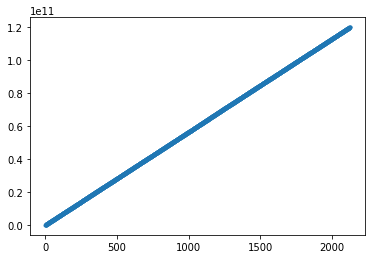

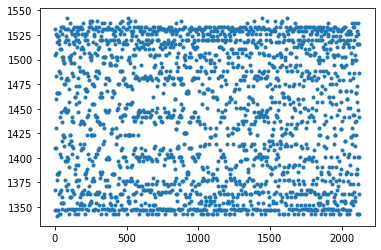

(2124, 2)


In [21]:
#補間した階差数列と照度の確認

# x = np.arange(1,18)
for i in range(1):
    ex_time = time(import_data(i))
    ex_illu = illu(import_data(i))
    plt.plot(interporate(ex_time, ex_illu).T[0],linestyle='',marker='.')
    plt.show()
    plt.plot(interporate(ex_time, ex_illu).T[1],linestyle='',marker='.')
    plt.show()
    print(interporate(ex_time, ex_illu).shape)

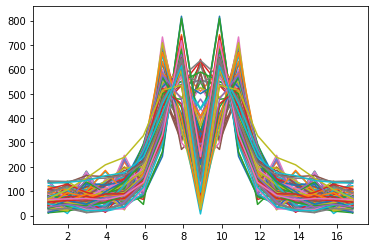

(100, 17)
(1, 100, 17)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [22]:
dataset_all=[]#9個の周波数を50回のデータからフーリエ変換で導出した
x = np.arange(17.78*1/18,17.78*18/18,17.78/18)
for name in range(1):
    dataset=[]
    data = import_data(name)
    int_time = time(data)
    int_illu = illu(data)
    perfect_data = interporate(int_time, int_illu)
    perfect_illu = perfect_data.T[1]
    for i in range(100):
        current_data = perfect_illu[0+18*i:18+i*18]
        F = FFT(current_data)
        dataset.append(F)
        plt.plot(x,F)
        # plt.title(f"{path[name][41:50]}周波数特性",fontname="MS Gothic")
        # plt.savefig(f"{path[name][41:50]}周波数特性.png")
    plt.show()
    dataset = np.array(dataset)
    print(dataset.shape)
    dataset_all.append(dataset)
dataset_all=np.array(dataset_all)
print(dataset_all.shape)

#それぞれの観測点における周波数特性の平均
all_mean_d = []
all_data_mean_d = []
for i in range(4):#9つの配置
    for j in range(1):#9つの周波数
        mean_d = np.mean(dataset_all[i,:,j])
        all_mean_d.append(mean_d)
    all_data_mean_d.append(all_mean_d)
    all_mean_d = []
all_data_mean_d=np.array(all_data_mean_d)
# for k in range(3):
#     plt.plot(all_data_mean_d[k])
#     plt.show()

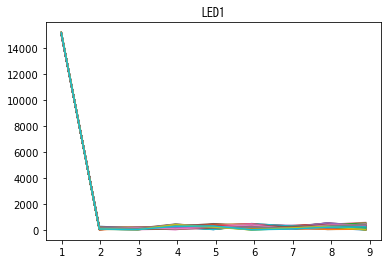

(100, 9)


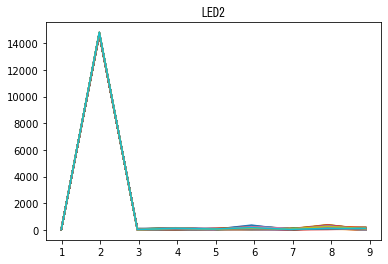

(100, 9)


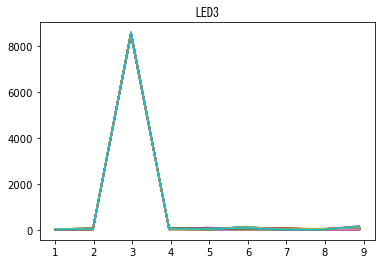

(100, 9)


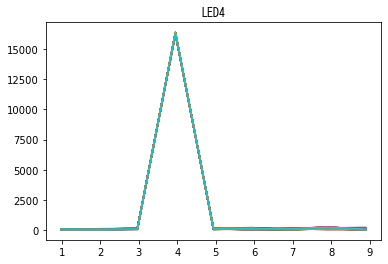

(100, 9)
(4, 100, 9)


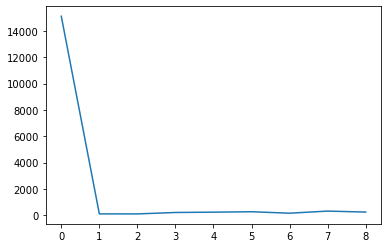

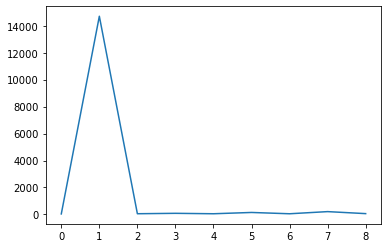

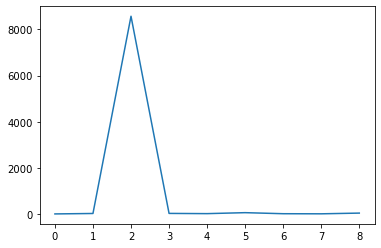

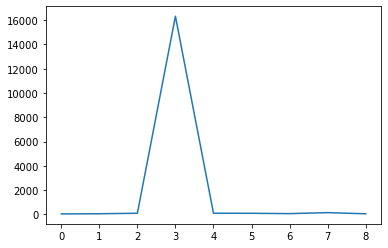

In [65]:
dataset_all_2=[]#9個の周波数を50回のデータからフーリエ変換で導出した
x = np.arange(17.78*1/18,17.78*10/18,17.78/18)
for name in range(4):
    dataset=[]
    data = import_data_2(name)
    int_time = time(data)
    int_illu = illu(data)
    perfect_data = interporate(int_time, int_illu)
    perfect_illu = perfect_data.T[1]
    for i in range(100):
        current_data = perfect_illu[100+18*i:118+i*18]
        F = FFT(current_data)
        dataset.append(F)
        plt.plot(x,F)
        plt.title(f"LED{name  +1}",fontname="MS Gothic")
        plt.savefig(f"LED{name + 1}周波数特性.png")
    plt.show()
    dataset = np.array(dataset)
    print(dataset.shape)
    dataset_all_2.append(dataset)
dataset_all_2=np.array(dataset_all_2)
print(dataset_all_2.shape)

#それぞれの観測点における周波数特性の平均
all_mean_d = []
all_data_mean_d_2 = []
for i in range(4):#9つの配置
    for j in range(9):#9つの周波数
        mean_d = np.mean(dataset_all_2[i,:,j])
        all_mean_d.append(mean_d)
    all_data_mean_d_2.append(all_mean_d)
    all_mean_d = []
all_data_mean_d_2=np.array(all_data_mean_d_2)
for k in range(4):
    plt.plot(all_data_mean_d_2[k])
    plt.show()

In [61]:
print(all_data_mean_d_2[0][0])

15114.395807304378


In [62]:
print(all_data_mean_d)

[[14896.10838244   632.50131838   696.4356414    514.85589861
    532.54713907   440.56760696   424.19984109   443.67671094
    403.85      ]
 [ 9440.98832556   617.34642751   563.42926669   285.99324216
    433.93951227   359.07605129   288.0635339    255.43578217
    197.82      ]
 [  318.15901511   377.59228497  8435.28765113  1103.42488078
    284.22534632   256.49881256   221.03781522   183.54158335
    169.88      ]
 [ 7844.32715087  4214.14659584   759.98088475   775.18526085
    640.39327324   552.06770801   391.26565676   288.7974438
    280.01      ]
 [ 3742.43515017  1175.53440349  2988.57777236  5498.1876018
    595.94926113   515.23852512   336.77989424   275.29258199
    192.1       ]
 [  663.50998393   617.74200442  4888.03217116  8346.5088811
    524.26707162   455.87700222   327.68592071   233.04028413
    176.69      ]
 [ 1191.1248938  15863.44718203  1091.84266161  1091.33847818
    794.64776032   716.08029212   485.21677795   514.0097024
    312.97      ]
 [  724.13

In [24]:
Fre_a = []
Fre_b = []
Fre_box =[]
for i in range(9):
    for j in range(50):
        for k in range(9):
            Fre_a.append(dataset_all[i][j][k])
        Fre_b.append(Fre_a)
        Fre_a =[]
    Fre_box.append(Fre_b)
    Fre_b = []
Fre_box = np.array(Fre_box)
print(Fre_box.shape)#(9個の観測点、50個のデータ、9個の周波数ピーク)
print(all_data_mean_d.shape)

(9, 50, 9)
(9, 9)


In [25]:
LED1_freq=[]
LED2_freq=[]
LED3_freq=[]
LED4_freq=[]
for i in range(9):
    LED1_freq.append(all_data_mean_d[i][0])
    LED2_freq.append(all_data_mean_d[i][1])
    LED3_freq.append(all_data_mean_d[i][2])
    LED4_freq.append(all_data_mean_d[i][3])
print(LED1_freq)

[14896.108382437626, 9440.988325564915, 318.1590151061327, 7844.3271508705875, 3742.435150173512, 663.5099839344741, 1191.1248937953367, 724.1320861270235, 1051.6024601943102]


In [26]:
distance_LED1=[]
distance_LED2=[]
distance_LED3=[]
distance_LED4=[]
LED_1=[1.0,1.0,2.24]
LED_2=[2.0,1.0,2.24]
LED_3=[1.0,2.0,2.24]
LED_4=[2.0,2.0,2.24]
LED_T=np.array([LED_1,LED_2,LED_3,LED_4])
recv_1=[1.0,1.0,1.16]
recv_2=[1.0,1.5,1.16]
recv_3=[1.0,2.0,1.16]
recv_4=[1.5,1.0,1.16]
recv_5=[1.5,1.5,1.16]
recv_6=[1.5,2.0,1.16]
recv_7=[2.0,1.0,1.16]
recv_8=[2.0,1.5,1.16]
recv_9=[2.0,2.0,1.16]
recv_T=np.array([recv_1,recv_2,recv_3,recv_4,recv_5,recv_6,recv_7,recv_8,recv_9])
for i in range(9):
    distance_LED1.append(distance(LED_T[0][0],LED_T[0][1],LED_T[0][2],recv_T[i][0],recv_T[i][1],recv_T[i][2]))
    distance_LED2.append(distance(LED_T[1][0],LED_T[1][1],LED_T[1][2],recv_T[i][0],recv_T[i][1],recv_T[i][2]))
    distance_LED3.append(distance(LED_T[2][0],LED_T[2][1],LED_T[2][2],recv_T[i][0],recv_T[i][1],recv_T[i][2]))
    distance_LED4.append(distance(LED_T[3][0],LED_T[3][1],LED_T[3][2],recv_T[i][0],recv_T[i][1],recv_T[i][2]))
distance_LED1=np.array(distance_LED1)
distance_LED2=np.array(distance_LED2)
distance_LED3=np.array(distance_LED3)
distance_LED4=np.array(distance_LED4)
print(distance_LED1)
print(distance_LED2)
print(distance_LED3)
print(distance_LED4)
print(recv_T[3])

[1.08       1.19012604 1.47186956 1.19012604 1.29089117 1.5544774
 1.47186956 1.5544774  1.77943811]
[1.47186956 1.5544774  1.77943811 1.19012604 1.29089117 1.5544774
 1.08       1.19012604 1.47186956]
[1.47186956 1.19012604 1.08       1.5544774  1.29089117 1.19012604
 1.77943811 1.5544774  1.47186956]
[1.77943811 1.5544774  1.47186956 1.5544774  1.29089117 1.19012604
 1.47186956 1.19012604 1.08      ]
[1.5  1.   1.16]


In [27]:
#基礎情報まとめ
f_s=17.78
f_k=[0.998, 1.976, 2.963, 3.951]
d_LED=[distance_LED1, distance_LED2, distance_LED3, distance_LED4]
Fre=[LED1_freq, LED2_freq, LED3_freq, LED4_freq]
Fre=np.array(Fre)
f_k=np.array(f_k)
print(d_LED[0])
print(Fre[0].shape)

[1.08       1.19012604 1.47186956 1.19012604 1.29089117 1.5544774
 1.47186956 1.5544774  1.77943811]
(9,)


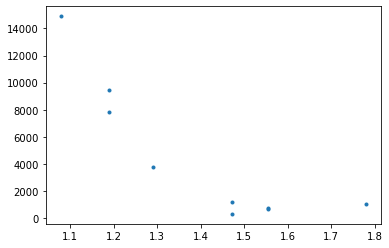

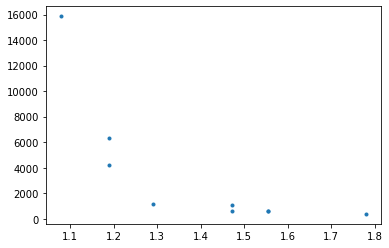

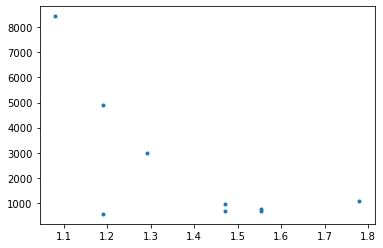

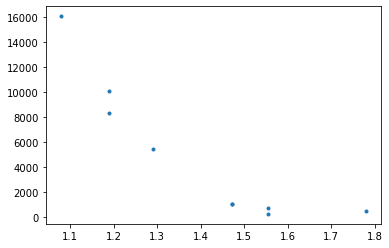

In [28]:
for i in range(4):
    plt.plot(d_LED[i], Fre[i], marker='.', linestyle='None')
    plt.show()

In [29]:
print(Fre[1])
print(d_LED[1])
print(LED_T[1][2])
print(np.abs(np.sin(f_k[0]*np.pi/f_s)/(f_k[0]*np.pi/f_s))*((2.24-1.16)**(0.82+5.35)))

[  632.50131838   617.34642751   377.59228497  4214.14659584
  1175.53440349   617.74200442 15863.44718203  6325.91471397
  1064.23635018]
[1.47186956 1.5544774  1.77943811 1.19012604 1.29089117 1.5544774
 1.08       1.19012604 1.47186956]
2.24
1.5994529439652136


[5.07668480e+04 8.79047519e-01]
[5.06364846e+04 8.91282709e-01]
[5.02005243e+04 9.37819229e-01]
[5.11006059e+04 8.56872056e-01]
[array([5.07668480e+04, 8.79047519e-01]), array([5.06364846e+04, 8.91282709e-01]), array([5.02005243e+04, 9.37819229e-01]), array([5.11006059e+04, 8.56872056e-01])]


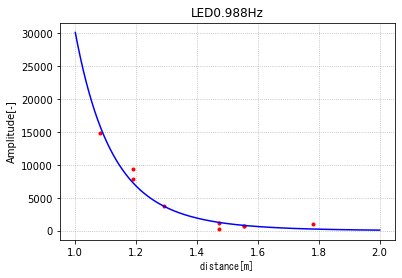

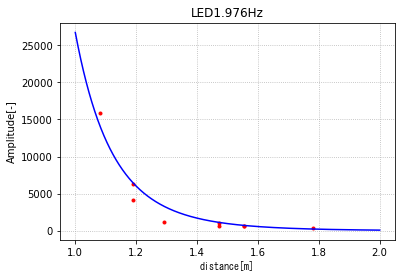

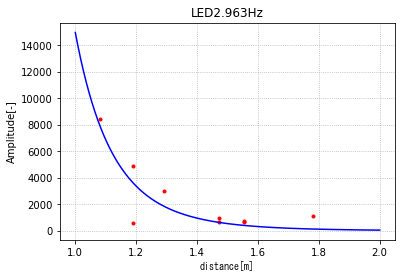

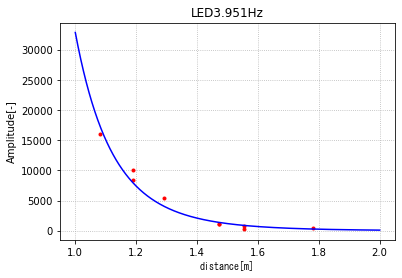

In [30]:
def theoreticalValue(x,a,b):
    f = a*np.sin(b*np.pi)*certain/x**(0.82+5.35+2)
    return f
beta_ID=[]
beta_box=[]
q = np.linspace(1.0,2.0,1000)

for i in range(4):
    certain = np.abs(np.sin(f_k[i]*np.pi/f_s)/(f_k[i]*np.pi/f_s))*((2.24-1.16)**(0.82+5.35))

    beta,pconv = curve_fit(theoreticalValue,d_LED[i],Fre[i], bounds=((0, 0), (100000, 2)))
    beta_ID.append(beta)
    print(beta)
    x = (i+1)*17.78/18
    x = round(x, 3)
    plt.figure()
    plt.plot(d_LED[i], Fre[i], 'r.')
    plt.plot(q, theoreticalValue(q,beta[0],beta[1]), 'b')
    plt.xlabel("distance[m]",fontname="MS Gothic")
    plt.ylabel("Amplitude[-]")
    plt.title(f"LED{x}Hz")
    plt.grid(linestyle='dotted')
    plt.savefig(f"LED{x}Hz.png")
print(beta_ID)

In [31]:
print(beta_ID[0])
print(beta_ID[1])
print(Fre[0])

[5.07668480e+04 8.79047519e-01]
[5.06364846e+04 8.91282709e-01]
[14896.10838244  9440.98832556   318.15901511  7844.32715087
  3742.43515017   663.50998393  1191.1248938    724.13208613
  1051.60246019]


In [32]:
A = 1/(0.82+5.35+2)
certain_1 = np.abs(np.sin(f_k[0]*np.pi/f_s)/(f_k[0]*np.pi/f_s))*((2.24-1.16)**(0.82+5.35))
certain_2 = np.abs(np.sin(f_k[1]*np.pi/f_s)/(f_k[1]*np.pi/f_s))*((2.24-1.16)**(0.82+5.35))
certain_3 = np.abs(np.sin(f_k[2]*np.pi/f_s)/(f_k[2]*np.pi/f_s))*((2.24-1.16)**(0.82+5.35))
certain_4 = np.abs(np.sin(f_k[3]*np.pi/f_s)/(f_k[3]*np.pi/f_s))*((2.24-1.16)**(0.82+5.35))
d_k_1 = (beta_ID[0][0]*np.sin(beta_ID[0][1]*np.pi)*certain_1/Fre[0])**A#LED1と9つの受信機の位置の関係dk
d_k_2 = (beta_ID[1][0]*np.sin(beta_ID[1][1]*np.pi)*certain_2/Fre[1])**A#LED2と5つの受信機の位置の関係dk
d_k_3 = (beta_ID[2][0]*np.sin(beta_ID[2][1]*np.pi)*certain_3/Fre[2])**A
d_k_4 = (beta_ID[3][0]*np.sin(beta_ID[3][1]*np.pi)*certain_4/Fre[3])**A
print(d_k_1)
print(d_k_2)
print(d_k_3)
print(d_k_4)

[1.0899899  1.1525619  1.74534505 1.178997   1.29077908 1.59518529
 1.48493807 1.57820569 1.50775517]
[1.58120738 1.58590804 1.68426687 1.25364652 1.46569029 1.5857837
 1.06588773 1.19284012 1.48364334]
[1.45560597 1.49385907 1.07265212 1.44013184 1.21791287 1.14673556
 1.37765941 1.46138821 1.40077608]
[1.66325649 1.78735722 1.51508907 1.58200006 1.2447086  1.18271075
 1.51713293 1.15468057 1.09140089]


In [33]:
def dd_k():
    dd_k=[]
    for i in range(9):
        d=[d_k_1[i],d_k_2[i],d_k_3[i],d_k_4[i]]
        dd_k.append(d)
        #print(dd_k[i])
    dd_k=np.array(dd_k)
    return dd_k

In [36]:
def objectiveFunction(beta):
    r = observedValue - theoreticalValue(beta)
    return r

def theoreticalValue(beta):
    f=[]
    for i in range(4):
        l = np.sqrt((beta[0]-LED_T[i][0])**2+(beta[1]-LED_T[i][1])**2+(2.24-1.16)**2)
        f.append(l)
    f=np.array(f)
    return f
observedValue=0
beta_all=[]
kaa=[]
initialValue = np.array([4, 0.5])
for j in range(9):
    observedValue = dd_k()[j]
    beta = leastsq(objectiveFunction, initialValue)
    beta_all.append(beta)
    print(beta_all[j])
    a = beta_all[j][0]
    kaa.append(a)
kaa= np.array(kaa)
print(kaa)

(array([0.94260314, 1.13557753]), 1)
(array([0.87286618, 1.03695751]), 1)
(array([1.14580075, 2.21003885]), 1)
(array([1.35552396, 1.08338666]), 1)
(array([1.375566  , 1.68594053]), 1)
(array([1.47926169, 2.05231112]), 1)
(array([1.74193814, 1.21374153]), 1)
(array([1.94284391, 1.59122047]), 1)
(array([1.75727229, 1.87336927]), 1)
[[0.94260314 1.13557753]
 [0.87286618 1.03695751]
 [1.14580075 2.21003885]
 [1.35552396 1.08338666]
 [1.375566   1.68594053]
 [1.47926169 2.05231112]
 [1.74193814 1.21374153]
 [1.94284391 1.59122047]
 [1.75727229 1.87336927]]


<ipython-input-37-51aa6525e876>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='',xy=(recv_T[0][0],recv_T[0][1]),xytext=(kaa[0][0],kaa[0][1]),xycoords='data',\
<ipython-input-37-51aa6525e876>:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='',xy=(recv_T[i+1][0],recv_T[i+1][1]),xytext=(kaa[i+1][0],kaa[i+1][1]),xycoords='data',\


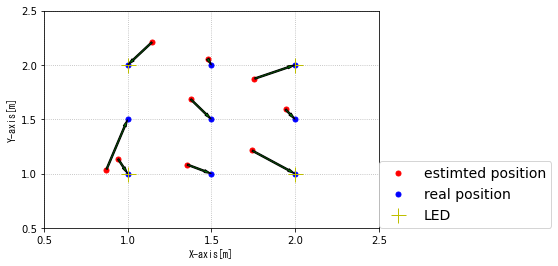

In [37]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.plot(kaa[0][0],kaa[0][1],"r.",label="estimted position",markersize=10)
plt.plot(recv_T[0][0],recv_T[0][1],"b.",label="real position",markersize=10)
ax.annotate(s='',xy=(recv_T[0][0],recv_T[0][1]),xytext=(kaa[0][0],kaa[0][1]),xycoords='data',\
            arrowprops=dict(facecolor='green', width =1.5,headwidth=3.0,headlength=7.0,shrink=0.01))
plt.plot(LED_T[0][0],LED_T[0][1],"y+",label="LED", markersize=15,)
for i in range(8):
    plt.plot(kaa[i+1][0],kaa[i+1][1],"r.",markersize=10)
    plt.plot(recv_T[i+1][0],recv_T[i+1][1],"b.",markersize=10)
    ax.annotate(s='',xy=(recv_T[i+1][0],recv_T[i+1][1]),xytext=(kaa[i+1][0],kaa[i+1][1]),xycoords='data',\
            arrowprops=dict(facecolor='green', width =1.5,headwidth=3.0,headlength=7.0,shrink=0.01))
for j in range(3):
    plt.plot(LED_T[j+1][0],LED_T[j+1][1],"y+", markersize=15,)
plt.xticks([0.5, 1, 1.5, 2.0, 2.5])
plt.yticks([0.5, 1, 1.5, 2.0, 2.5])
plt.xlabel("X-axis[m]",fontname="MS Gothic")
plt.ylabel("Y-axis[m]",fontname="MS Gothic")
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0, fontsize=14)
plt.grid(linestyle='dotted')
plt.savefig("result.png")


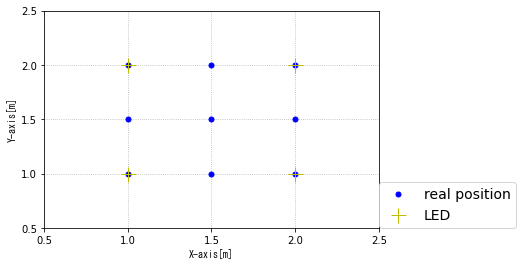

In [38]:
plt.plot(recv_T[0][0],recv_T[0][1],"b.",label="real position",markersize=10)
plt.plot(LED_T[0][0],LED_T[0][1],"y+",label="LED", markersize=15,)
for i in range(8):
    plt.plot(recv_T[i+1][0],recv_T[i+1][1],"b.",markersize=10)
for j in range(3):
    plt.plot(LED_T[j+1][0],LED_T[j+1][1],"y+", markersize=15,)
plt.xticks([0.5, 1, 1.5, 2.0, 2.5])
plt.yticks([0.5, 1, 1.5, 2.0, 2.5])
plt.xlabel("X-axis[m]",fontname="MS Gothic")
plt.ylabel("Y-axis[m]",fontname="MS Gothic")
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0, fontsize=14)
plt.grid(linestyle='dotted')

In [39]:
#90%タイル
ala = []
for i in range(9):
    agc = np.sqrt((kaa[i][0]-recv_T[i][0])**2+(kaa[i][1]-recv_T[i][1])**2)
    ala.append(agc)
print(ala)

[0.14722658292427007, 0.4801784609206034, 0.25568374306555747, 0.16681324669465103, 0.22373578843151787, 0.05627193776806908, 0.3350841165070712, 0.10764753636999709, 0.27377377778746775]


In [40]:
print(np.percentile(ala, 90))

0.3641029853897777


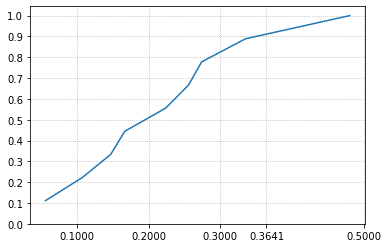

In [41]:
jjj = []
for j in range(9):
    jjj.append((j+1)/9)
plt.plot(np.sort(ala),jjj)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks([0.1, 0.2, 0.3, 0.5, np.percentile(ala, 90)])
plt.grid(linestyle='dotted')